# Такси Перу

In [ ]:
# импортируем необходимые для работы библиотеки

In [1]:
import pandas as pd
import seaborn as sns
sns.set(
    font_scale=1.5,
    style="whitegrid",
    rc={'figure.figsize':(12,5)}
        )
import matplotlib.pyplot as plt

In [ ]:
# открываем файлы и визуально знакомимся с данными

journey_id – уникальный id поездки     
user_id – id пользователя     
driver_id – id водителя     
taxi_id – id машины     
icon – тип поездки     
start_type – тип заказа (asap, reserved, delayed)     
start_at – время начала поездки     
start_lat – исходное местоположение пользователя, широта     
start_lon – исходное местоположение пользователя, долгота     
end_at – время окончания поездки      
end_lat – итоговое местоположение, широта     
end_lon – итоговое местоположение, долгота     
end_state – состояние заказа     
driver_start_lat – исходное местоположение водителя, широта    
driver_start_lon – исходное местоположение водителя, долгота    
arrived_at – время прибытия водителя     
source – платформа, с которой сделан заказ     
driver_score – оценка водителя клиентом     
rider_score – оценка клиента водителем     

In [2]:
taxi = pd.read_csv('./3_taxi_peru.csv', sep = ';')
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [5]:
taxi.shape

(23111, 19)

In [6]:
taxi.nunique()

journey_id          23111
user_id              1390
driver_id             168
taxi_id               213
icon                    3
start_type              3
start_at            20987
start_lat           11753
start_lon            8489
end_at              21780
end_lat             12266
end_lon              9084
end_state               6
driver_start_lat    18425
driver_start_lon    18314
arrived_at          17156
source                  5
driver_score            6
rider_score             6
dtype: int64

In [7]:
taxi.dtypes

journey_id           object
user_id              object
driver_id            object
taxi_id              object
icon                 object
start_type           object
start_at             object
start_lat            object
start_lon            object
end_at               object
end_lat              object
end_lon              object
end_state            object
driver_start_lat     object
driver_start_lon     object
arrived_at           object
source               object
driver_score        float64
rider_score         float64
dtype: object

In [10]:
taxi.start_at = pd.to_datetime(taxi.start_at)
taxi.end_at = pd.to_datetime(taxi.end_at)
taxi.arrived_at = pd.to_datetime(taxi.arrived_at)

In [11]:
taxi.describe()

,driver_score,rider_score
count,7650.000000,15390.000000
mean,3.933333,4.755491
std,1.744948,0.840558
min,0.000000,0.000000
25%,4.000000,5.000000
50%,5.000000,5.000000
75%,5.000000,5.000000
max,5.000000,5.000000


In [13]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23111 entries, 0 to 23110
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   journey_id        23111 non-null  object        
 1   user_id           23111 non-null  object        
 2   driver_id         19726 non-null  object        
 3   taxi_id           19726 non-null  object        
 4   icon              23111 non-null  object        
 5   start_type        23111 non-null  object        
 6   start_at          23111 non-null  datetime64[ns]
 7   start_lat         23111 non-null  object        
 8   start_lon         23111 non-null  object        
 9   end_at            22835 non-null  datetime64[ns]
 10  end_lat           23111 non-null  object        
 11  end_lon           23111 non-null  object        
 12  end_state         23099 non-null  object        
 13  driver_start_lat  19621 non-null  object        
 14  driver_start_lon  1962

In [14]:
taxi.isna().sum()

journey_id              0
user_id                 0
driver_id            3385
taxi_id              3385
icon                    0
start_type              0
start_at                0
start_lat               0
start_lon               0
end_at                276
end_lat                 0
end_lon                 0
end_state              12
driver_start_lat     3490
driver_start_lon     3490
arrived_at           5395
source                123
driver_score        15461
rider_score          7721
dtype: int64

**Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.**

In [17]:
taxi.source.value_counts(normalize = True).mul(100).round()

iPhone     42.0
web        33.0
Android    21.0
iPad        2.0
Wap         1.0
Name: source, dtype: float64

*Больше всего заказов было сделано с платформы iPhone (42 %)*

**Чтобы показать разницу более наглядно, попробуем визуализировать показатели.
Агрегируйте данные и постройте барчарт, где по оси x будет расположено название платформы (source), а по оси y – количество заказов (абсолютные значения).**

In [18]:
pop_source = taxi.groupby('source').aggregate({'journey_id' : 'count'}).reset_index()
pop_source

,source,journey_id
0,Android,4909
1,Wap,136
2,iPad,571
3,iPhone,9741
4,web,7631


<AxesSubplot:xlabel='source', ylabel='journey_id'>

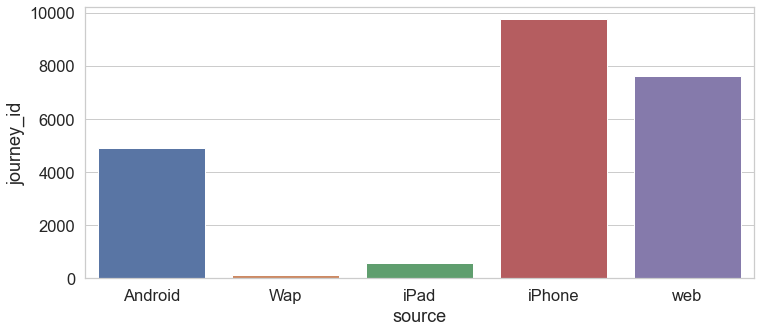

In [21]:
sns.barplot(x = 'source', y = 'journey_id', data = pop_source)

**Альтернативный вариант построения распределения категориальной переменной – sns.countplot. В качестве единственного аргумента можно передать всего одну колонку: например, source, а количество значений для оси y функция посчитает самостоятельно.
Используйте данный тип графика и проверьте, какой тип поездки (icon) встречался чаще всего.**

C:\Users\Лидия\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='icon', ylabel='count'>

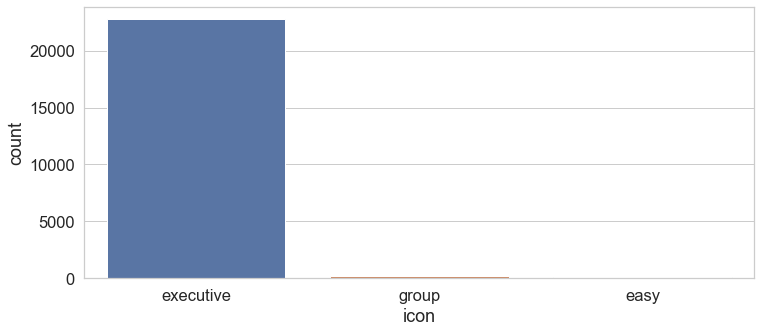

In [22]:
sns.countplot(taxi['icon'])

*Чаще всего встречался тип поездок "executive"*

**Теперь попробуем построить более сложный график!
С помощью sns.countplot и параметра hue визуализируйте распределение переменной end_state (итоговое состояние заказа) в разбивке по платформам (source).
Иными словами, по оси x расположите платформу, а в качестве цвета используйте состояние заказа.**

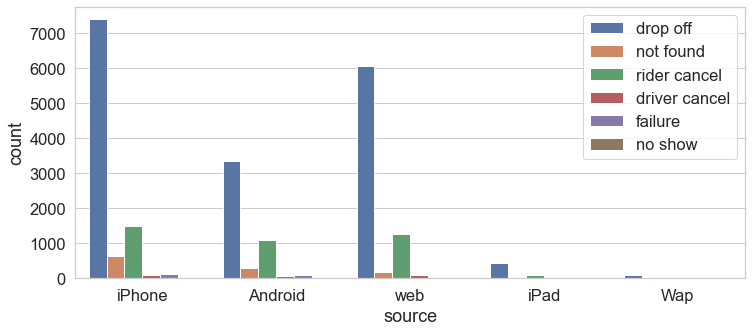

In [29]:
sns.countplot(x = taxi.source, hue = taxi.end_state)
plt.legend(loc='upper right')

*Больше всего заказов со статусом drop off совершено с платформы iPhone    
На Android отмененных поездок (rider cancel) меньше, чем на iPhone    
Наибольшая разница между количеством drop off и rider cancel наблюдается для платформы iPhone*

**Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:
Посчитайте частоту встречаемости каждой из оценок
Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
Сбросьте индексы
Переименуйте колонки в driver_score и percentage
Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
Запишите результат в driver_score_counts**

In [30]:
driver_score_counts = taxi.driver_score \
                        .value_counts(normalize=True) \
                        .mul(100).round(2).reset_index() \
                        .rename(columns={'driver_score' : 'percentage', 'index' : 'driver_score'}) \
                        .sort_values('driver_score')
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


**Теперь строим график! Укажите, какую из четырех строчек в нижепредставленном коде нужно исправить, чтобы получить график:    
ax = sns.barplot(x=driver_score, y=percentage, data=driver_score_counts, color='blue', alpha=0.5)    
ax.set(xlabel='Driver score', ylabel='Percentage')    
sns.despine()  # убрать часть рамки графика   
plt.show()**

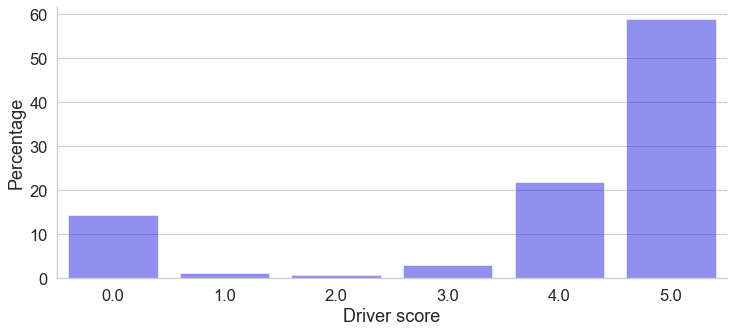

In [32]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

*Чтобы получить график необходимо было исправить первую строчку кода: в параметрах x и y отсутствовали кавычки*

**Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график.
В чем его отличие от распределения оценок водителей?**

In [33]:
rider_score_counts = taxi.rider_score \
    .value_counts(normalize = True) \
    .mul(100).round(2).reset_index() \
    .rename(columns = {'rider_score' : 'percentage' , 'index' : 'rider_score'}) \
    .sort_values('rider_score')
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


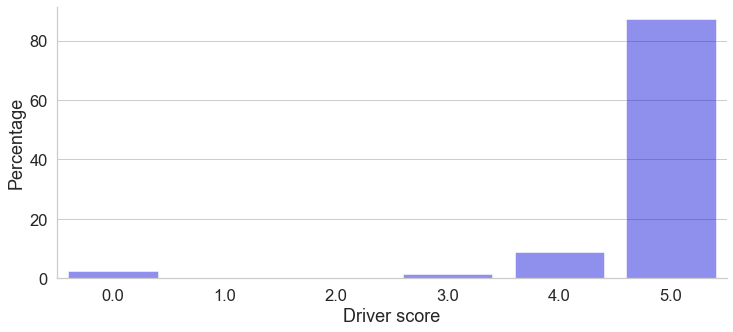

In [34]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

*Более чем в 80% случаев водители поставили клиентам 5 звездочек
Водители ставят меньше 0, чем клиенты*

**Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type).**

In [35]:
taxi = taxi.query("start_type == 'asap' or start_type == 'reserved'")

**Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах.**

In [36]:
taxi['wait_time'] = taxi['arrived_at'] - taxi['start_at']
taxi['wait_time'] = taxi.wait_time.astype('timedelta64[m]')
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0


**Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved'). Опозданием считается время ожидания wait_time > 0.0.
Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз**

In [46]:
taxi.loc[(taxi.start_type == 'reserved') & (taxi.wait_time > 0.0)].driver_id.value_counts().idxmax()

'406921adcca37705ef527b4246c0cfea'

*id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз == 406921adcca37705ef527b4246c0cfea*

**Подумайте, что может влиять на число опозданий водителя из прошлого задания**

Гипотеза 1: у него самые долгие поездки, и не получается рассчитывать время (например, стоял в пробке)

In [68]:
# посчитаем медиану продолжительности поездок по водителям, и посмотрим, войдет ли искомый водитель в топ
taxi['duration'] = taxi.end_at - taxi.start_at
taxi['duration'] =pd.to_timedelta(taxi.duration).astype('timedelta64[m]')
taxi.groupby('driver_id').aggregate({'duration' : 'median'}).sort_values('duration', ascending=False).head(10).round(0)

,duration
driver_id,
660b608a136931aa5ab0d31556ede173,91.0
ae06c34243f741e203e97c48eb632cb6,62.0
8d6e3838b34e9c7181ac358dbc30bfe1,62.0
b4f2c132de1648fecf41bb1651525c91,60.0
b1a3f957deba8f50052700bfb28a3fa2,58.0
c76f7b7ecd87b555ba34fa076d6751c0,54.0
2b9be9ff113177942788e7d6e8554a15,53.0
bc5c1ae63a528f0371154594b3477211,53.0
0fd4a08189ac948f6beaa2d3145c81b6,52.0


Здесь искомого айди нет (406921adcca37705ef527b4246c0cfea). Наш водитель не в топ-10, так что гипотезу отбрасываем.

Гипотеза 2: у него в принципе больше всех поездок, поэтому он и опаздывает больше всех

In [73]:
# найдем топ-5 по числу поездок
taxi.groupby(['driver_id']).aggregate({'journey_id' : 'count'}).sort_values('journey_id', ascending=False).head(5)

,journey_id
driver_id,
c814db2127582cf95dea1f74f43127c2,1523
d665fb9f75ef5d9cd0fd89479380ba78,1225
ff5c924e0b630fd7c019a4234059fdf4,1111
406921adcca37705ef527b4246c0cfea,1075
ec84a73745199ff840ecafcb924383ad,974


Наш водитель на 4м месте, но не на 1м. Сравним с топом "опаздывающих":

In [76]:
taxi \
    .query("start_type == 'reserved' and wait_time > 0.0") \
    .groupby('driver_id', as_index = False) \
    .aggregate({'taxi_id' : 'count'}) \
    .sort_values('taxi_id', ascending = False).head(5)

,driver_id,taxi_id
24,406921adcca37705ef527b4246c0cfea,67
86,d665fb9f75ef5d9cd0fd89479380ba78,59
93,ec84a73745199ff840ecafcb924383ad,57
29,56f59b58bcbbd1cdabc3652e713134c2,51
77,c814db2127582cf95dea1f74f43127c2,45


Видим, что трое водителей присутствуют в обоих топах. Логично – кто больше ездит, тот больше и опаздывает.

*Вывод – наш водитель:
– один из самых активных (совершает много поездок)
– не очень пунктуальный*

**Добавьте столбец month, где будет храниться номер месяца, в котором был сделан заказ (start_at),  и столбец weekday – название дня недели.**

In [77]:
taxi['month'] = taxi.start_at.dt.month
taxi['weekday'] = taxi.start_at.dt.day_name()

**Постройте график числа заказов по месяцам (month). Подумайте, с чем может быть связана полученная картина. Вопрос: в каком летнем месяце было сделано наименьшее число заказов?**

C:\Users\Лидия\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

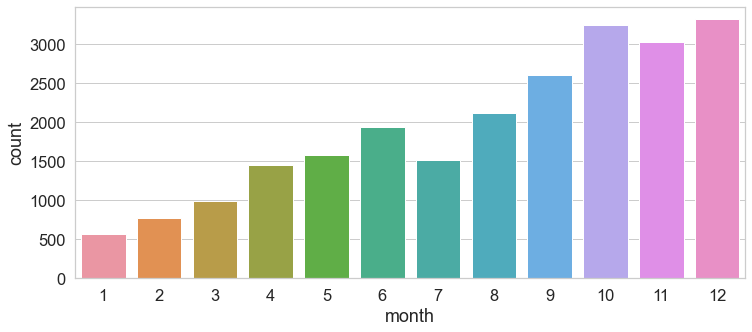

In [78]:
sns.countplot(taxi['month'])

*наименьшее число заказов летом было сделано в 7 месяце (июль). Возможно в июле в перу спад туристического сезона*

**А теперь – график по дням недели (weekday). Задать порядок столбиков на графике можно с помощью аргумента order, которому нужно передать список названий в нужном порядке. 
Вопрос: в какой день недели суммарно поступает меньше всего заказов?**

C:\Users\Лидия\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='count'>

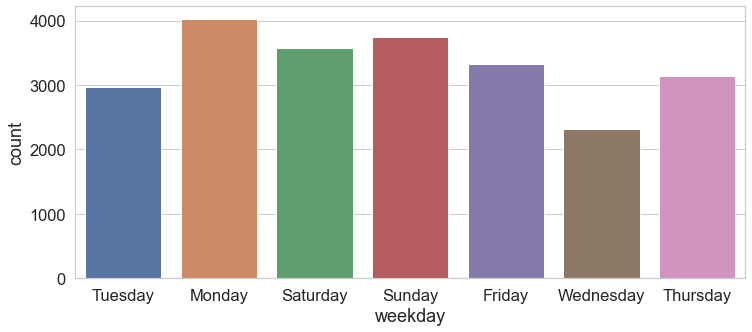

In [79]:
sns.countplot(taxi['weekday'], order = ['Tuesday', 'Monday', 'Saturday', 'Sunday', 'Friday', 'Wednesday',
       'Thursday'])

*меньше всего заказов суммарно поступает в среду (Wednesday)*

**Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:
DAU (daily active users) – число уникальных пользователей за день     
WAU (weekly active users) – число уникальных пользователей за неделю     
MAU (monthly active users) – число уникальных пользователей за месяц     
Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени. Постройте график MAU и выберите верные утверждения.**

C:\Users\Лидия\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='user_id'>

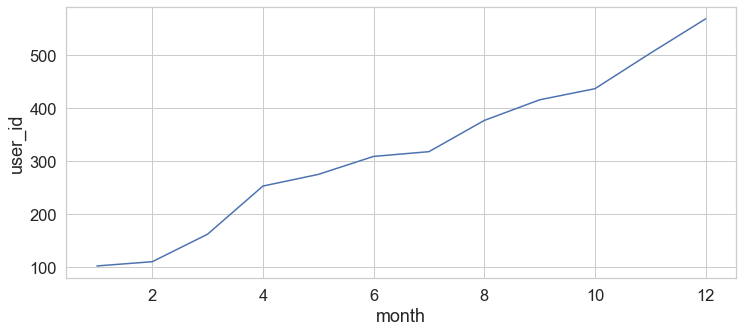

In [80]:
taxi_MAU = taxi \
    .groupby('month', as_index = False) \
    .aggregate({'user_id' : 'nunique'})
sns.lineplot(taxi_MAU['month'], taxi_MAU['user_id'])

*В течение всего года число уникальных пользователей увеличивалось
MAU за апрель примерно в 2.5 раза больше, чем за январь*